In [1]:
# Global imports
%matplotlib inline
%load_ext autoreload
%autoreload 2
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import analysis as an
from pathlib import Path

project_folder = Path(an.__file__).parent.parent.resolve()

# plt.style.use('seaborn')
sns.set_context('paper', font_scale=2)
sns.set_style('whitegrid')
sns.set_color_codes('deep')
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

# Connectivity Analysis


In [2]:
data_folder = project_folder / 'experiment' / 'data'
results_folder = project_folder / 'results'
results_folder.mkdir(exist_ok=True)
print(f'Storing results in: {results_folder}')
print('Available data paths:')
[x for x in sorted(data_folder.iterdir()) if x.is_dir()]


Storing results in: /home/geissdoerfer/workspace/exp-wifi-channel/results
Available data paths:


[PosixPath('/home/geissdoerfer/workspace/exp-wifi-channel/experiment/data/2018-01-11-164500'),
 PosixPath('/home/geissdoerfer/workspace/exp-wifi-channel/experiment/data/2018-01-11-180602'),
 PosixPath('/home/geissdoerfer/workspace/exp-wifi-channel/experiment/data/2018-01-11-182755'),
 PosixPath('/home/geissdoerfer/workspace/exp-wifi-channel/experiment/data/2018-01-11-225043'),
 PosixPath('/home/geissdoerfer/workspace/exp-wifi-channel/experiment/data/2018-01-17-144113'),
 PosixPath('/home/geissdoerfer/workspace/exp-wifi-channel/experiment/data/2018-01-17-192523')]

In [11]:
df_list = [
    an.get_iperf_folder(data_folder / '2018-01-17-144113', recursive=True),
    an.get_iperf_folder(data_folder / '2018-01-17-192523', recursive=True),
]
df = pd.concat(df_list)

# df = an.get_iperf_folder(data_folder / '2017-12-12-111553', recursive=True)
df.groupby(['Kernel',  'Access Point', 'Client'])['Throughput [Mbps]'].describe()

count          mean           std  \
Kernel                 Access Point Client                                      
3.18.87-031887-generic nuc10        nuc12   600.0  1.982681e+06  1.107750e+06   
                                    nuc13   600.0  5.511620e+07  1.023968e+06   
                                    nuc4    600.0  2.065760e+07  1.105270e+06   
                                    nuc6    600.0  4.771828e+07  1.001825e+06   
                       nuc11        nuc13   600.0  8.500891e+06  4.330391e+05   
                                    nuc4    600.0  1.873739e+07  6.947005e+05   
                       nuc12        nuc10   600.0  3.695138e+06  3.183239e+05   
                                    nuc4    600.0  3.696525e+07  1.087711e+06   
                                    nuc6    600.0  1.572306e+07  9.192109e+05   
                       nuc13        nuc4    600.0  1.695798e+07  5.590556e+05   
                       nuc4         nuc10   600.0  1.994752e+07  1.632116e+06   
                                    nuc11   600.0  1.454954e+07  3.596013e+05   
                                    nuc12   600.0  3.282807e+07  1.482703e+06   
                                    nuc13   600.0  9.420252e+06  3.392312e+05   
                                    nuc6    600.0  2.832870e+07  1.073818e+06   
                       nuc6         nuc10   600.0  5.555932e+07  9.214495e+05   
                                    nuc12   600.0  1.142139e+07  9.682329e+05   
                                    nuc13   600.0  3.836400e+07  6.788698e+05   
                                    nuc4    600.0  3.865563e+07  7.449842e+05   
4.14.5-041405-generic  nuc10        nuc12   600.0  2.531438e+06  1.204261e+06   
                                    nuc13   600.0  5.507240e+07  1.530037e+06   
                                    nuc4    600.0  2.901202e+07  5.950485e+06   
                                    nuc6    600.0  8.020296e+07  1.683148e+06   
                       nuc11        nuc13   600.0  9.240247e+06  4.518421e+06   
                                    nuc4    600.0  2.109330e+07  3.064439e+06   
                       nuc12        nuc4    600.0  3.711183e+07  2.728012e+06   
                                    nuc6    600.0  1.898730e+07  2.895118e+06   
                       nuc13        nuc10   600.0  5.575996e+07  1.158453e+06   
                                    nuc11   600.0  7.166688e+06  8.440859e+05   
                                    nuc4    600.0  1.393983e+07  1.244893e+06   
                                    nuc6    600.0  3.825696e+07  8.938981e+05   
                       nuc4         nuc10   600.0  2.860831e+07  9.132692e+05   
                                    nuc11   600.0  1.744841e+07  1.755698e+06   
                                    nuc12   600.0  2.815765e+07  1.071149e+06   
                                    nuc13   600.0  1.421497e+07  1.102339e+06   
                                    nuc6    600.0  2.761621e+07  8.714244e+05   
                       nuc6         nuc10   600.0  5.590821e+07  1.311118e+06   
                                    nuc12   600.0  1.520533e+07  7.952546e+05   
                                    nuc13   600.0  3.801797e+07  1.072993e+06   
                                    nuc4    600.0  4.564352e+07  8.018753e+06   

                                                   min         25%  \
Kernel                 Access Point Client                           
3.18.87-031887-generic nuc10        nuc12     262140.0    851926.5   
                                    nuc13   44164800.0  54639625.0   
                                    nuc4    17891400.0  19791900.0   
                                    nuc6    39446700.0  47253800.0   
                       nuc11        nuc13    6291410.0   8257407.5   
                                    nuc4    15990900.0  18284544.0   
                       nuc12        nuc10     393238.0   3604500.0   
           

In [48]:
df.groupby(['Connection','Kernel'])['Throughput [Mbps]'].describe()


count          mean           std  \
Connection     Kernel                                                       
nuc10 \& nuc12 3.18.87-031887-generic  1200.0  2.838909e+06  1.182119e+06   
               4.14.5-041405-generic    600.0  2.531438e+06  1.204261e+06   
nuc10 \& nuc13 3.18.87-031887-generic   600.0  5.511620e+07  1.023968e+06   
               4.14.5-041405-generic   1200.0  5.541618e+07  1.399379e+06   
nuc10 \& nuc4  3.18.87-031887-generic  1200.0  2.030256e+07  1.437794e+06   
               4.14.5-041405-generic   1200.0  2.881017e+07  4.259910e+06   
nuc10 \& nuc6  3.18.87-031887-generic  1200.0  5.163880e+07  4.038427e+06   
               4.14.5-041405-generic   1200.0  6.805558e+07  1.224565e+07   
nuc11 \& nuc13 3.18.87-031887-generic   600.0  8.500891e+06  4.330391e+05   
               4.14.5-041405-generic   1200.0  8.203467e+06  3.410470e+06   
nuc11 \& nuc4  3.18.87-031887-generic  1200.0  1.664346e+07  2.166541e+06   
               4.14.5-041405-generic   1200.0  1.927086e+07  3.091198e+06   
nuc12 \& nuc4  3.18.87-031887-generic  1200.0  3.489666e+07  2.443762e+06   
               4.14.5-041405-generic   1200.0  3.263474e+07  4.934793e+06   
nuc12 \& nuc6  3.18.87-031887-generic  1200.0  1.357223e+07  2.349557e+06   
               4.14.5-041405-generic   1200.0  1.709632e+07  2.842908e+06   
nuc13 \& nuc4  3.18.87-031887-generic  1200.0  1.318912e+07  3.798661e+06   
               4.14.5-041405-generic   1200.0  1.407740e+07  1.183319e+06   
nuc13 \& nuc6  3.18.87-031887-generic   600.0  3.836400e+07  6.788698e+05   
               4.14.5-041405-generic   1200.0  3.813747e+07  9.943144e+05   
nuc4 \& nuc6   3.18.87-031887-generic  1200.0  3.349217e+07  5.247566e+06   
               4.14.5-041405-generic   1200.0  3.662987e+07  1.066848e+07   

                                              min         25%         50%  \
Connection     Kernel                                                       
nuc10 \& nuc12 3.18.87-031887-generic    262140.0   2293972.5   3276830.0   
               4.14.5-041405-generic     196587.0   1441850.0   2555805.0   
nuc10 \& nuc13 3.18.87-031887-generic  44164800.0  54639625.0  55313250.0   
               4.14.5-041405-generic   34137000.0  54791600.0  55704650.0   
nuc10 \& nuc4  3.18.87-031887-generic  16383900.0  19332900.0  20053000.0   
               4.14.5-041405-generic   14221200.0  27112625.0  28770200.0   
nuc10 \& nuc6  3.18.87-031887-generic  39446700.0  47912475.0  49579750.0   
               4.14.5-041405-generic   45875000.0  56164775.0  63171050.0   
nuc11 \& nuc13 3.18.87-031887-generic   6291410.0   8257407.5   8519500.0   
               4.14.5-041405-generic    1376080.0   6143915.0   7339945.0   
nuc11 \& nuc4  3.18.87-031887-generic  12646600.0  14615075.0  15630700.0   
               4.14.5-041405-generic    9433910.0  17808050.0  18743600.0   
nuc12 \& nuc4  3.18.87-031887-generic  25100100.0  32900300.0  34996050.0   
               4.14.5-041405-generic   22607100.0  28049477.0  30079600.0   
nuc12 \& nuc6  3.18.87-031887-generic   8650740.0  11534575.0  13336550.0   
               4.14.5-041405-generic    8715770.0  15122000.0  16122350.0   
nuc13 \& nuc4  3.18.87-031887-generic   6683600.0   9437330.0  10027100.0   
               4.14.5-041405-generic    9173430.0  13304225.0  14156350.0   
nuc13 \& nuc6  3.18.87-031887-generic  34007900.0  38015400.0  38471000.0   
               4.14.5-041405-generic   31194300.0  37747175.0  38402350.0   
nuc4 \& nuc6   3.18.87-031887-generic  21689100.0  28572900.0  31947400.0   
               4.14.5-041405-generic   22673100.0  27790875.0  30309850.0   

                                              75%         max  
Connection     Kernel                                          
nuc10 \& nuc12 3.18.87-031887-generic   3735532.5   5046220.0  
               4.14.5-041405-generic    3473187.5   6029320.0  
nuc10 \& nuc13 3.18.87-031887-generic  55772100.0  57021600.0  
               4.14.5-

In [49]:
df.groupby(['Kernel',  'Access Point', 'Client'])['Throughput [Mbps]']
df.head()

,Throughput [Mbps],bytes,end,omitted,packets,seconds,socket,start,Client,Access Point,Kernel,Timestamp,System Info,Protocol,Connection,file
0,31847500.0,3981312,1.00010,False,486,1.000100,4,0.00000,nuc13,nuc6,4.14.5-041405-generic,"Wed, 17 Jan 2018 16:04:26 GMT",Linux nuc13 4.14.5-041405-generic #20171210133...,UDP,nuc13 \& nuc6,nuc6-nuc13
1,37025900.0,4628480,2.00015,False,565,1.000050,4,1.00010,nuc13,nuc6,4.14.5-041405-generic,"Wed, 17 Jan 2018 16:04:26 GMT",Linux nuc13 4.14.5-041405-generic #20171210133...,UDP,nuc13 \& nuc6,nuc6-nuc13
2,36177700.0,4521984,3.00010,False,552,0.999949,4,2.00015,nuc13,nuc6,4.14.5-041405-generic,"Wed, 17 Jan 2018 16:04:26 GMT",Linux nuc13 4.14.5-041405-generic #20171210133...,UDP,nuc13 \& nuc6,nuc6-nuc13
3,38141800.0,4767744,4.00010,False,582,1.000010,4,3.00010,nuc13,nuc6,4.14.5-041405-generic,"Wed, 17 Jan 2018 16:04:26 GMT",Linux nuc13 4.14.5-041405-generic #20171210133...,UDP,nuc13 \& nuc6,nuc6-nuc13
4,38008100.0,4751360,5.00017,False,580,1.000070,4,4.00010,nuc13,nuc6,4.14.5-041405-generic,"Wed, 17 Jan 2018 16:04:26 GMT",Linux nuc13 4.14.5-041405-generic #20171210133...,UDP,nuc13 \& nuc6,nuc6-nuc13


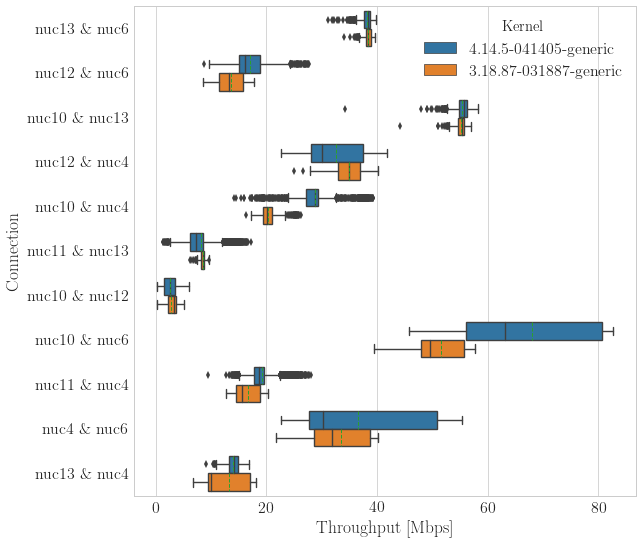

In [29]:
fig, ax = plt.subplots(figsize=(9,9))

sns.boxplot(
    x='Throughput [Mbps]',
    y='Connection',
    hue='Kernel',
    data=df,
    showfliers=True,
    showmeans=True,
    meanline=True,
#     split=True,
#     cut=0,
);
ax.xaxis.set_major_formatter(an.bitrate_formatter)
fig.savefig(str(results_folder / 'throughput_kernels.pdf'), transparent=False, bbox_inches='tight')

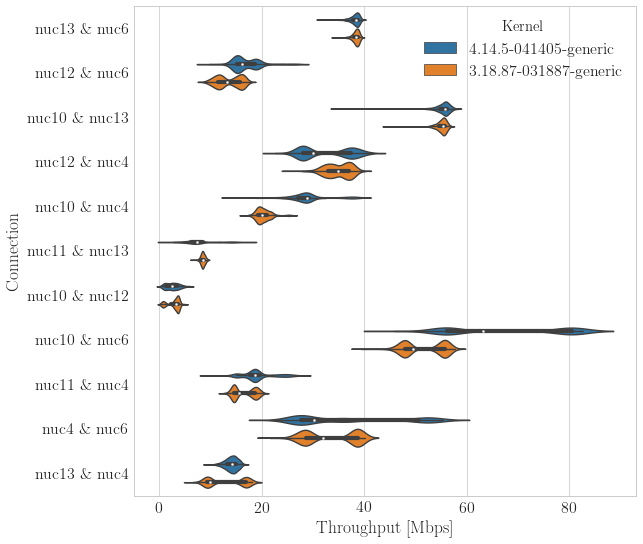

In [16]:
fig, ax = plt.subplots(figsize=(9,9))

sns.violinplot(
    x='Throughput [Mbps]',
    y='Connection',
    hue='Kernel',
    data=df,
    showfliers=False,
#     split=True,
#     cut=0,
);
ax.xaxis.set_major_formatter(an.bitrate_formatter)

In [17]:
connections = pd.pivot_table(
    df[df['Kernel'] == '4.14.5-041405-generic'],
    values='Throughput [Mbps]',
    index='Access Point',
    columns='Client',
    aggfunc=np.mean,
)
connections = connections * 1e-6

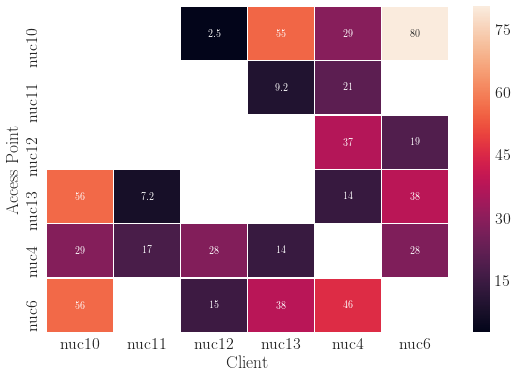

In [18]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(connections, annot=True, linewidths=.5, ax=ax)